# Question D7

*Question*: How many ML-enabled system projects have you participated in? Please, provide your best estimate:

*Answer Type*: Numerical

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D7_Total_ML_Projects'].head()

0     1
1     1
2     5
3     6
4    23
Name: D7_Total_ML_Projects, dtype: object

In [4]:
# cleaning data
dataframe_obj.remove_value_from_df('-99','D7_Total_ML_Projects')

In [5]:
# convert column to integer - if you read before this line, you will get an string like '14'
dataframe_obj.df = dataframe_obj.df.astype({"D7_Total_ML_Projects": int}, errors='raise') 

In [6]:
# plot object for bootstrapped data
d7_plot = PlotUtils(pd.DataFrame(
    data={'ML Projects': list(dataframe_obj.df['D7_Total_ML_Projects'])}
))

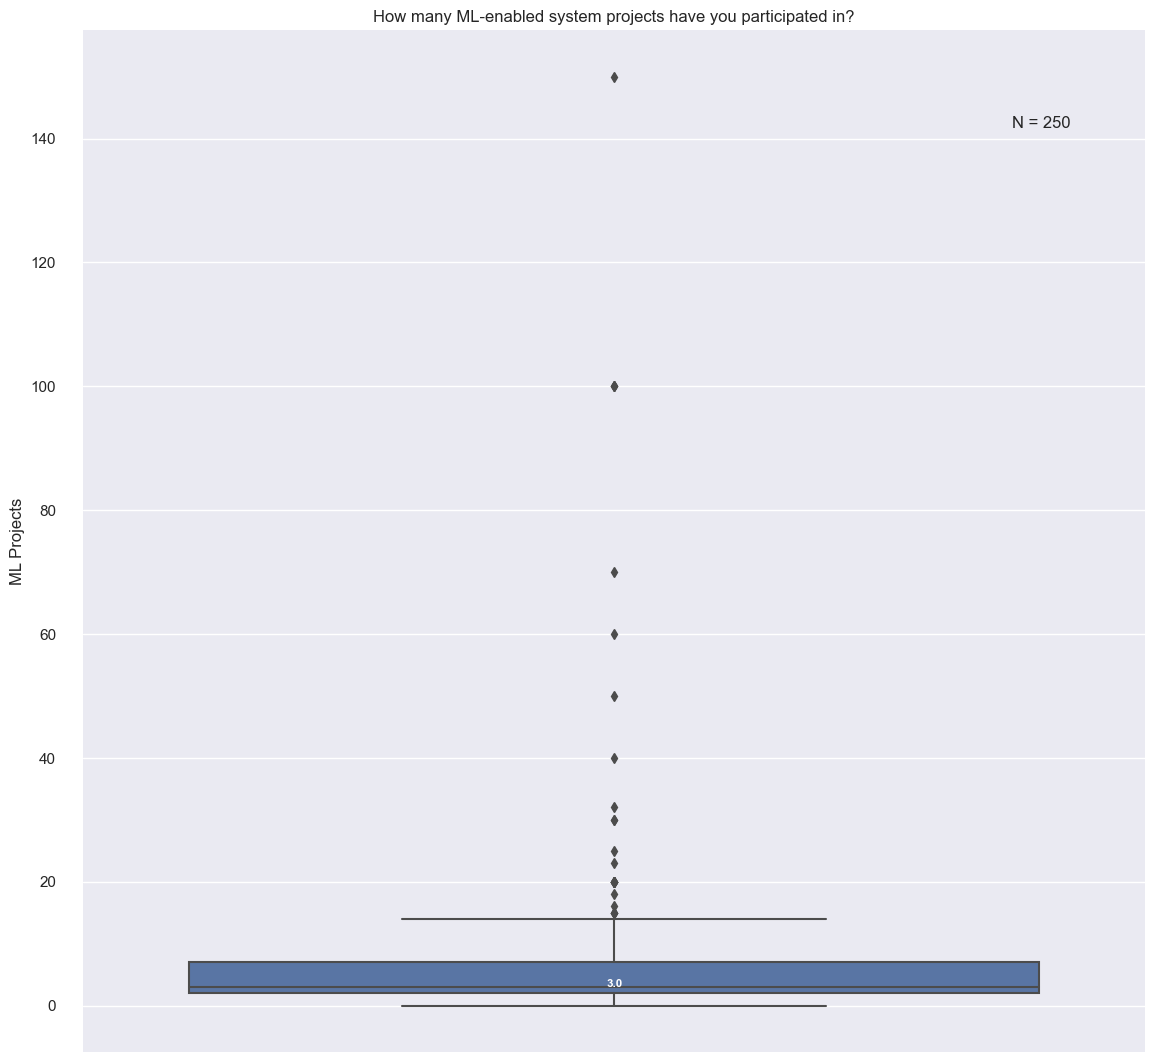

In [7]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D7_Total_ML_Projects']))

d7_plot.single_boxplot("ML Projects",
                       title="How many ML-enabled system projects have you participated in?",
                       total_answers=total_answers)

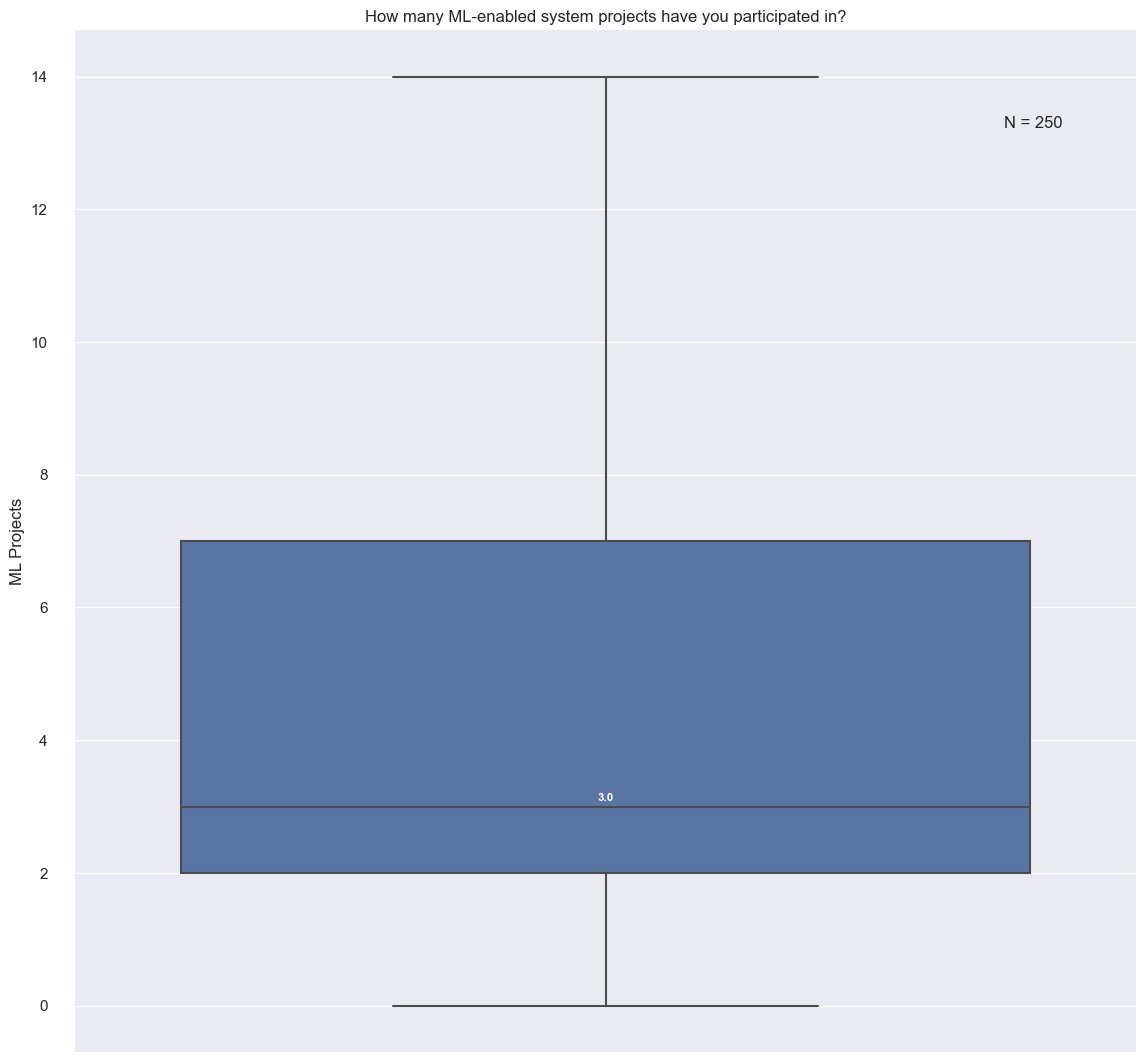

In [8]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D7_Total_ML_Projects']))

d7_plot.single_boxplot("ML Projects", outliers=False,
                       title="How many ML-enabled system projects have you participated in?",
                       total_answers=total_answers)

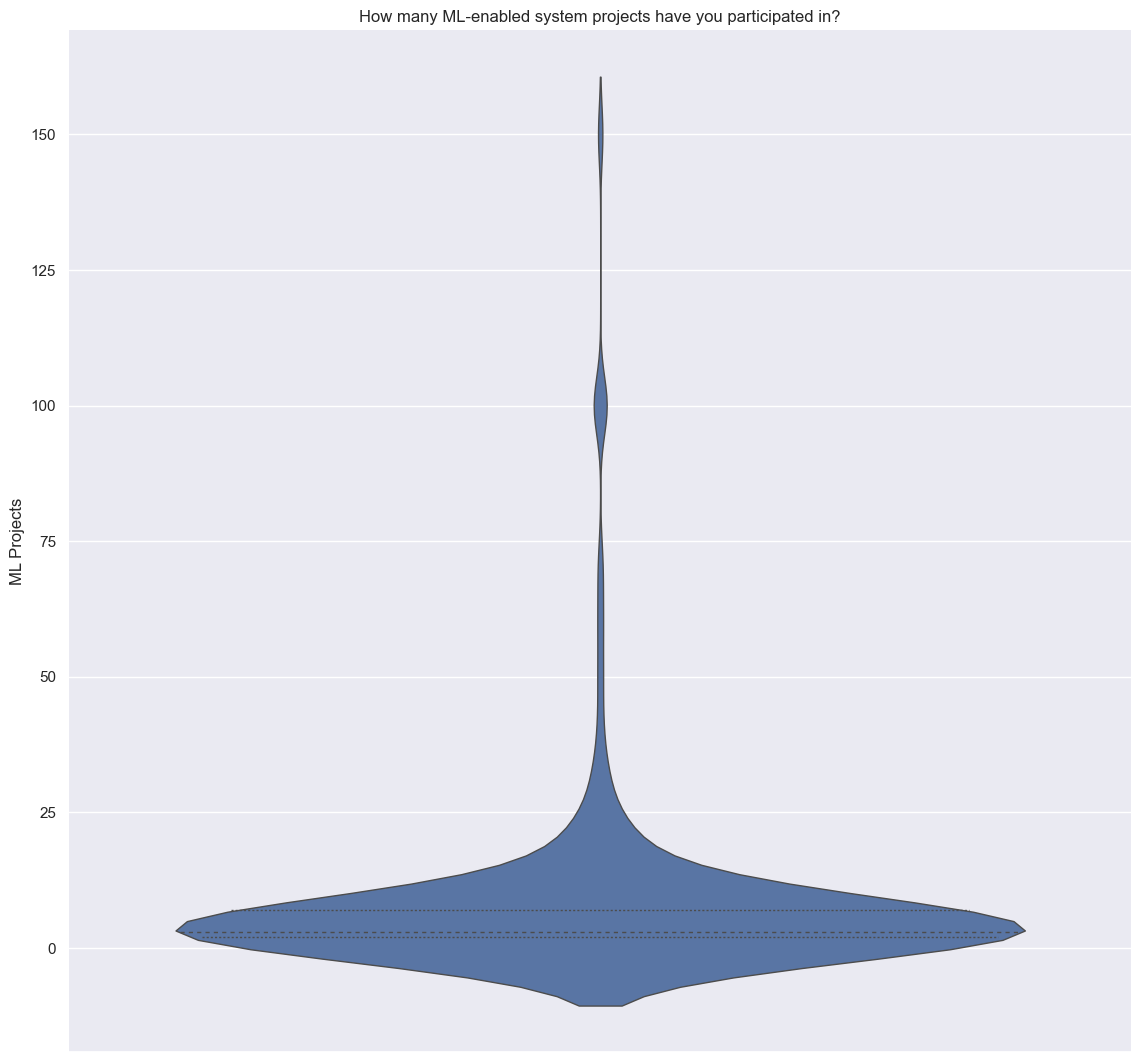

In [9]:
d7_plot.single_violinplot("ML Projects",
                          title="How many ML-enabled system projects have you participated in?")

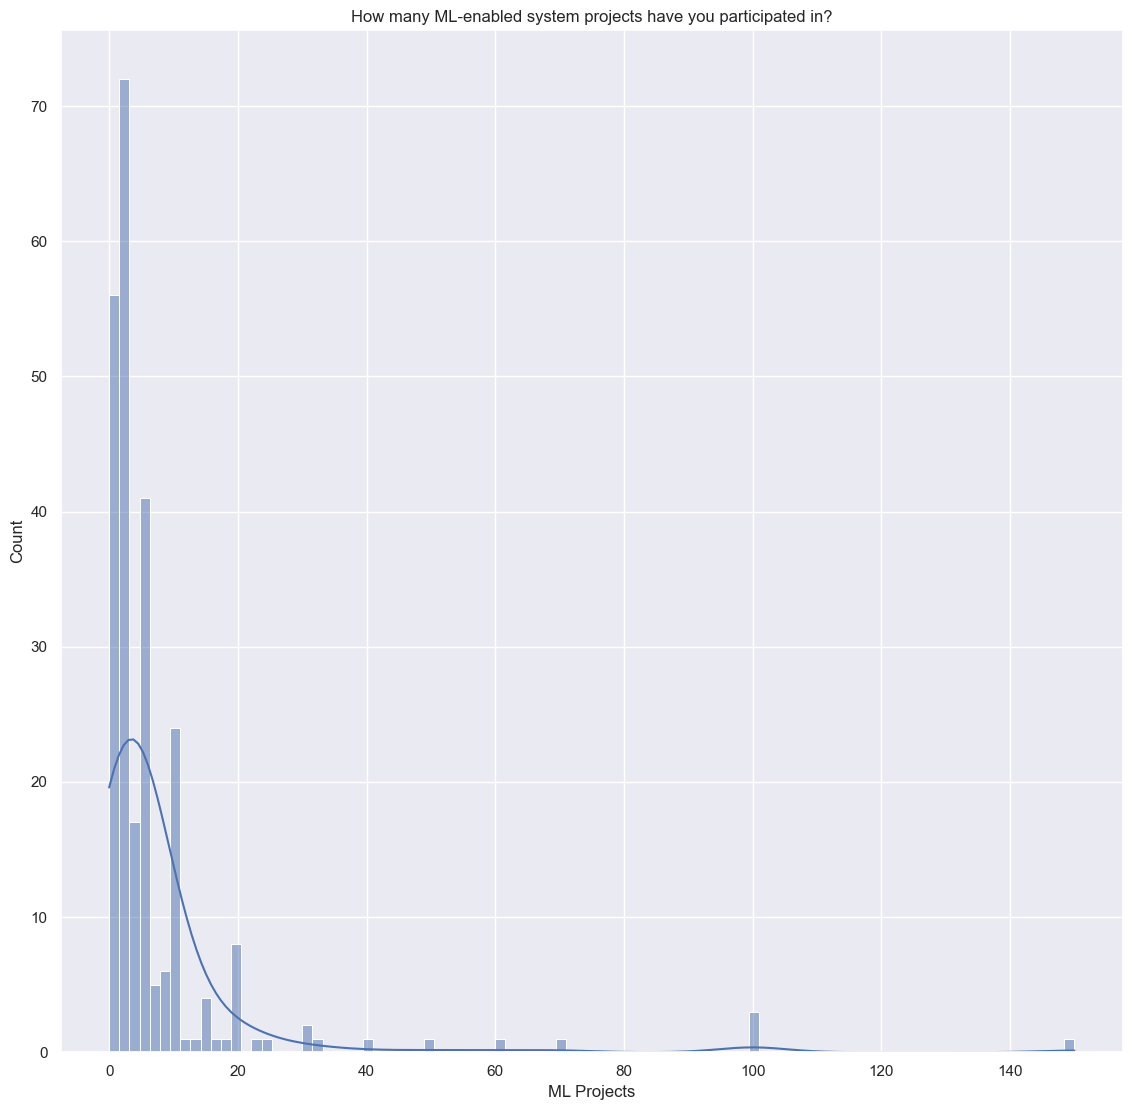

In [10]:
d7_plot.single_histplot("ML Projects",
                        title="How many ML-enabled system projects have you participated in?")

### Bootstrapping Analysis

In [11]:
valid_answers_list = list(dataframe_obj.df['D7_Total_ML_Projects'])

total_answers_int = len(dataframe_obj.df['D7_Total_ML_Projects'])

In [12]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [13]:
bootstrapped_list_data = bootstrapping_obj.bootstrapping_numerical_fields()

In [14]:
# plot object for bootstrapped data
d7_boot_plot = PlotUtils(pd.DataFrame(
    data={'ML Projects': bootstrapped_list_data['population']}
))

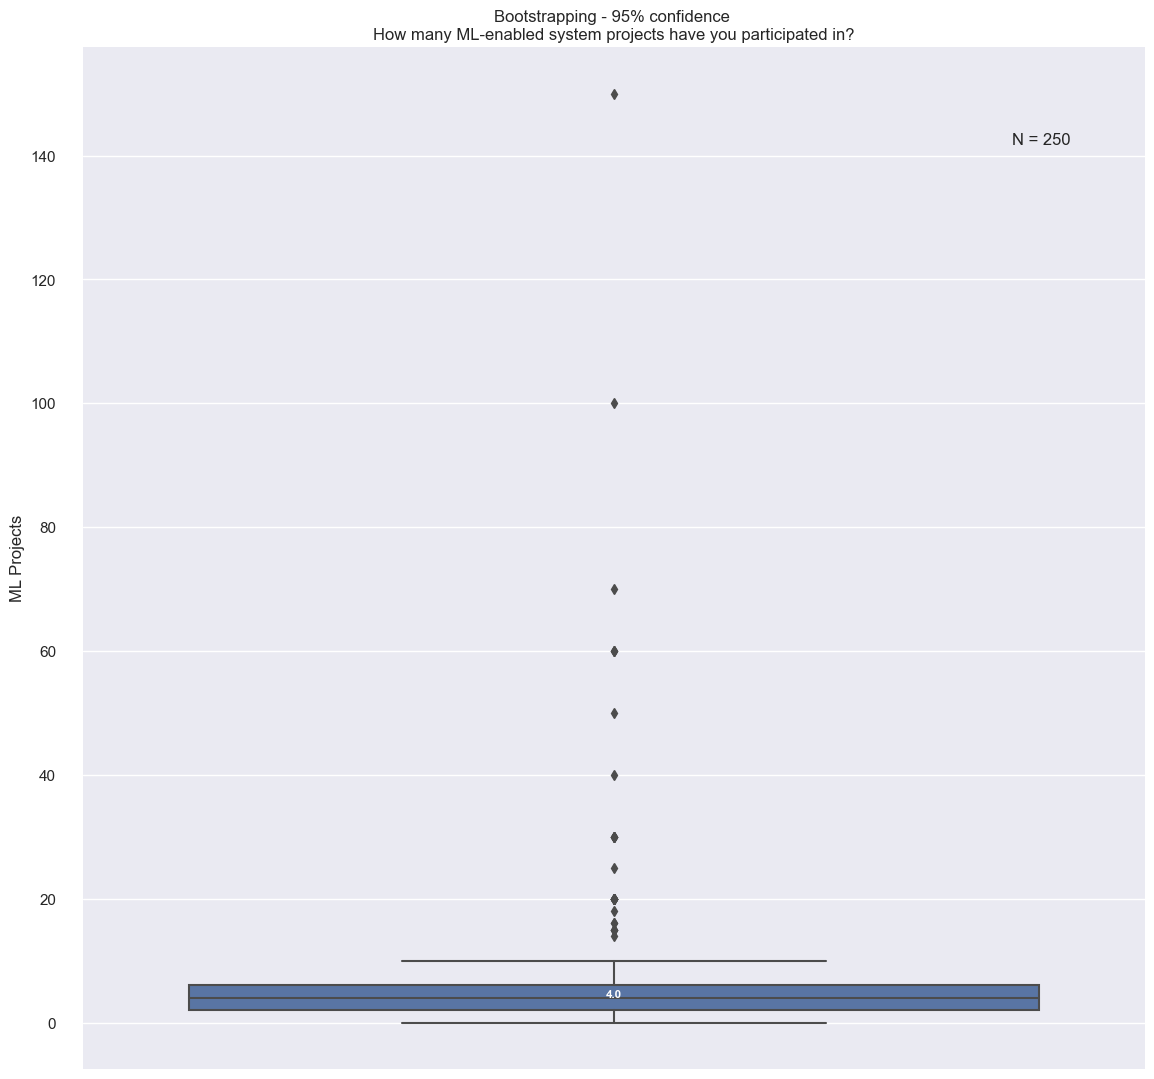

In [15]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D7_Total_ML_Projects']))

d7_boot_plot.single_boxplot("ML Projects",
                            title="Bootstrapping - 95% confidence \nHow many ML-enabled system projects have you participated in?",
                            total_answers=total_answers)

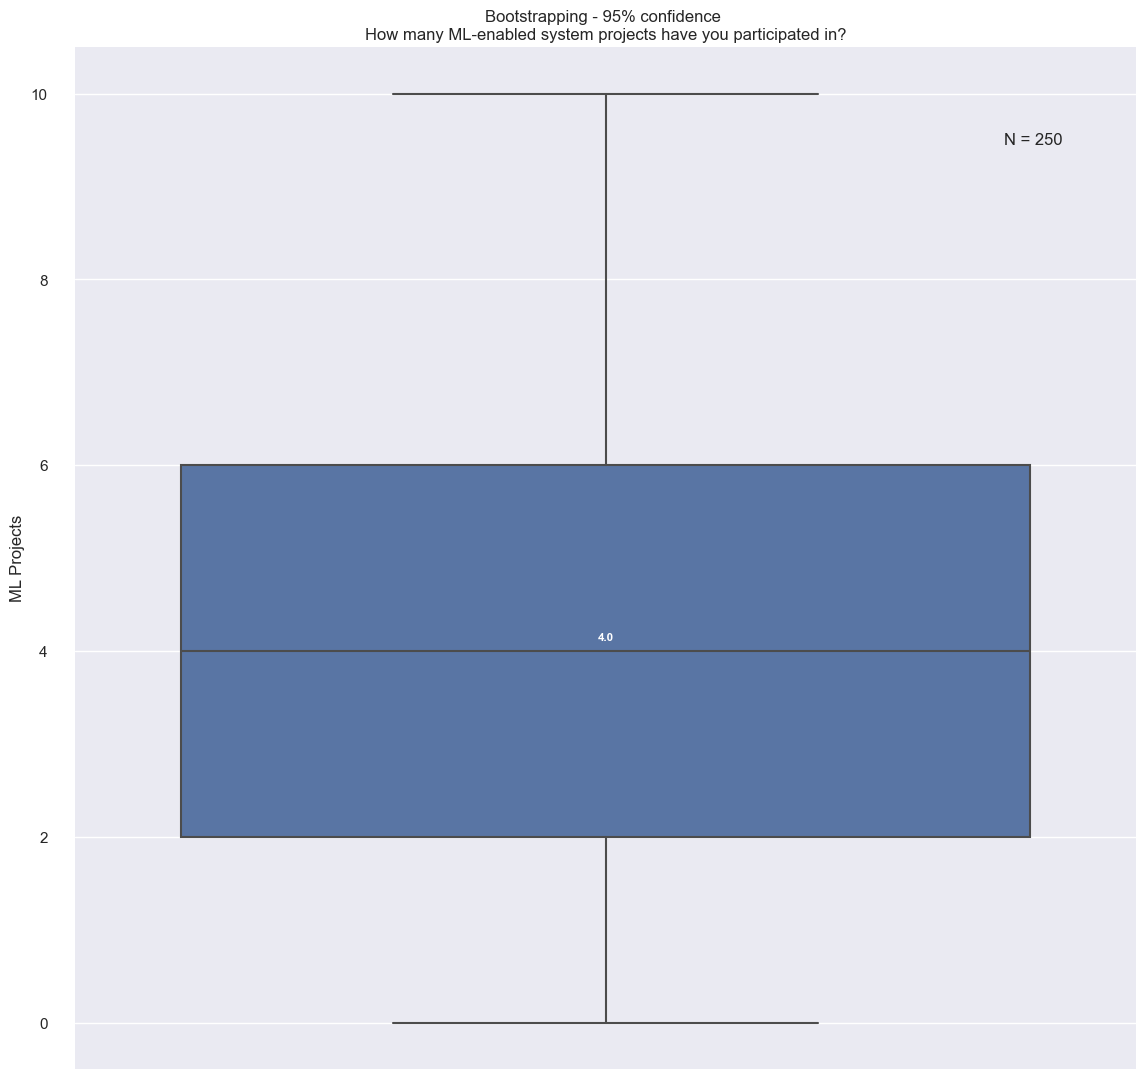

In [16]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['D7_Total_ML_Projects']))

d7_boot_plot.single_boxplot("ML Projects", outliers=False,
                            title="Bootstrapping - 95% confidence \nHow many ML-enabled system projects have you participated in?",
                            total_answers=total_answers)

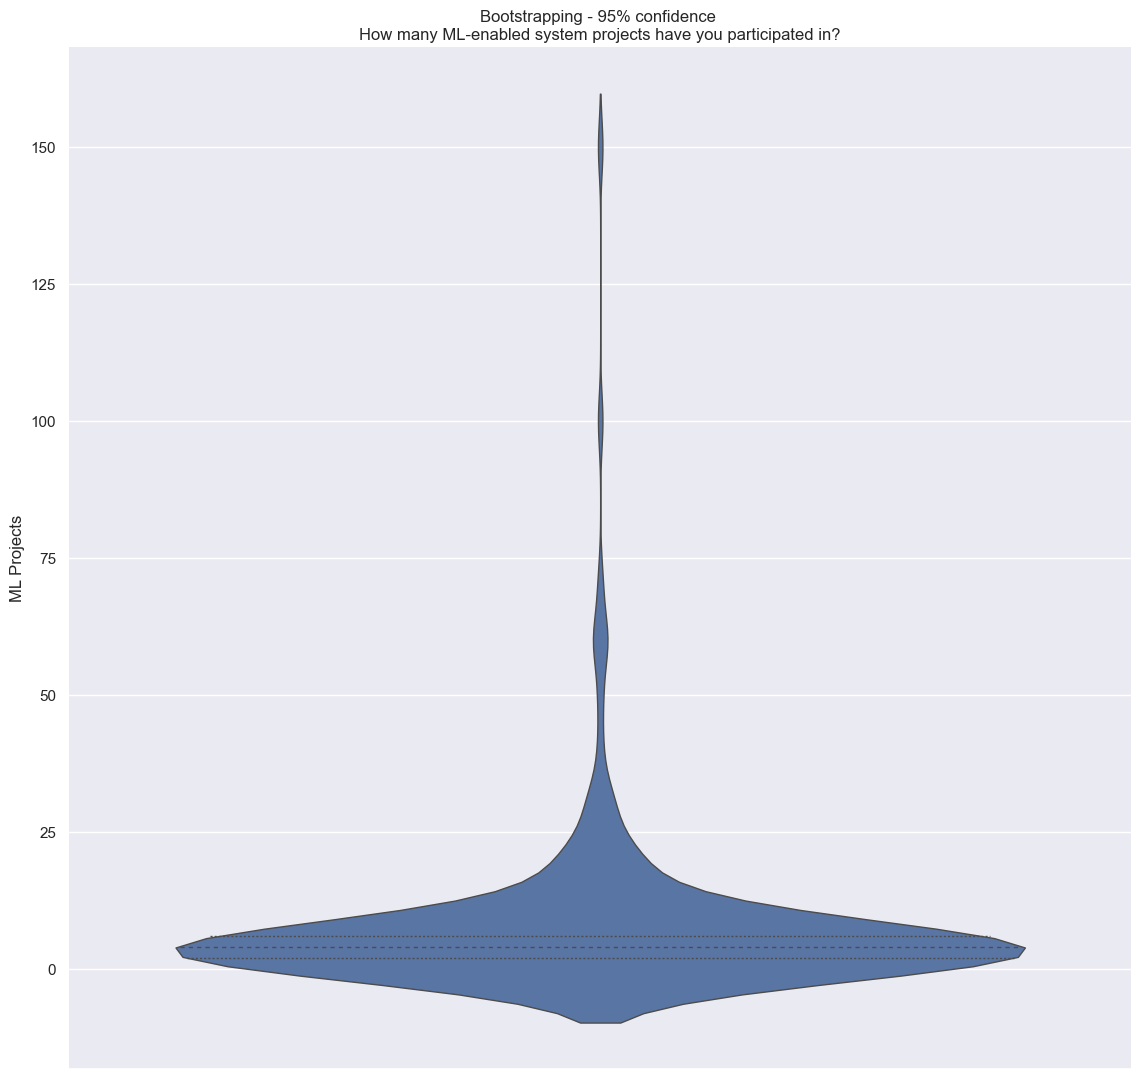

In [17]:
d7_boot_plot.single_violinplot("ML Projects",
                               title="Bootstrapping - 95% confidence \nHow many ML-enabled system projects have you participated in?")

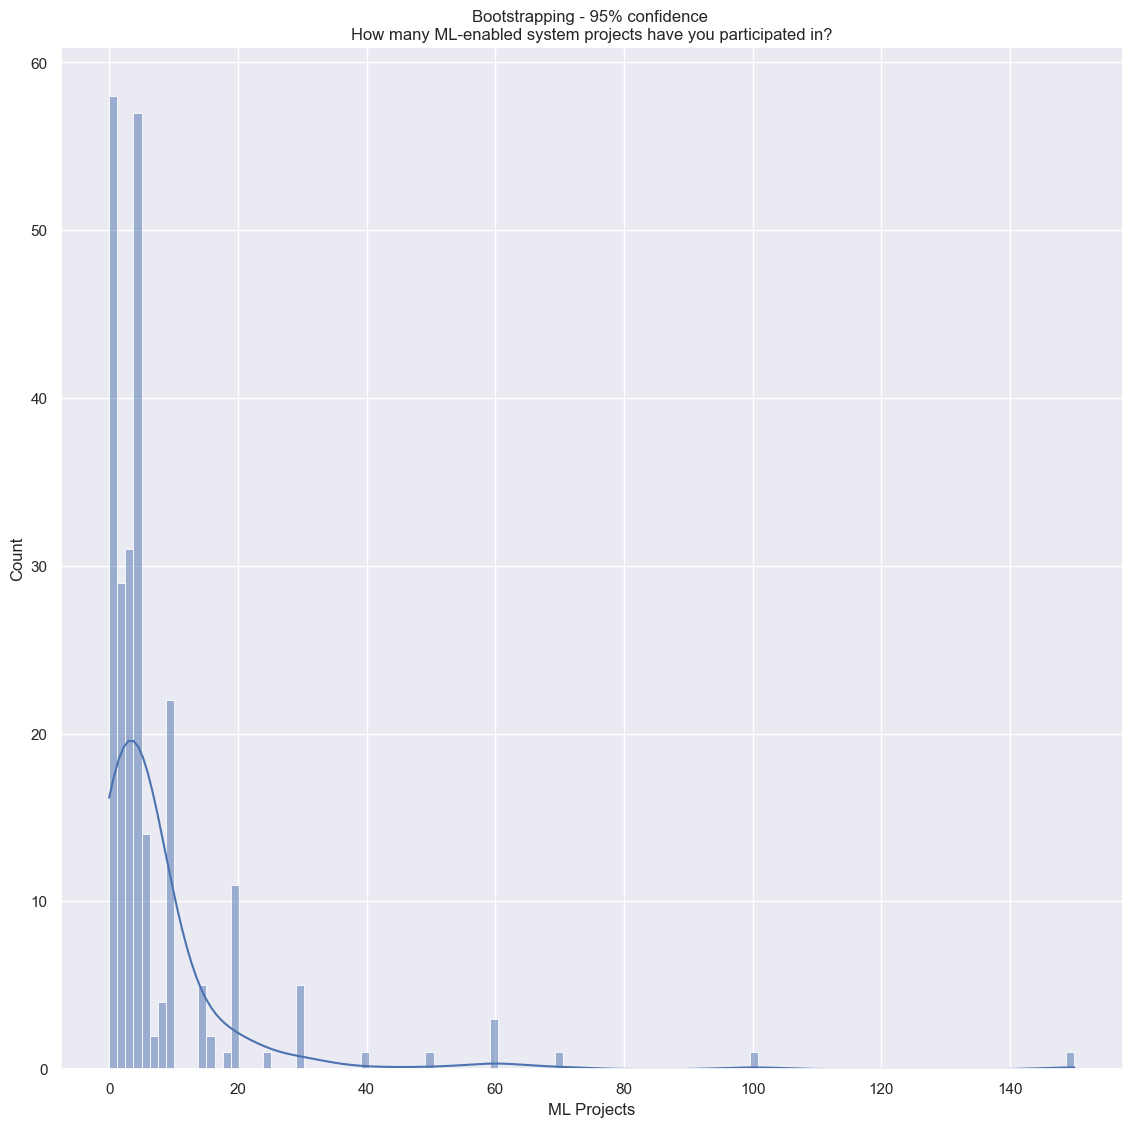

In [18]:
d7_boot_plot.single_histplot("ML Projects",
                             title="Bootstrapping - 95% confidence \nHow many ML-enabled system projects have you participated in?")

In [19]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
print(bootstrapped_list_data['confidence'])

Option: (Lower Value, Mean, Upper Value)
(5.8666265327884926, 7.692, 9.517373467211508)
